In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [47]:
busquedas = []

f9_300_no = pd.read_csv('./Processed Data/f9-PHMPR-300-NO.csv', index_col=0)
busquedas.append({'F9-300-NO':f9_300_no})
f9_300_300 = pd.read_csv('./Processed Data/f9-PHMPR-300-300.csv', index_col=0)
busquedas.append({'F9-300-300':f9_300_300})
f9_500_300 = pd.read_csv('./Processed Data/f9-PHMPR-500-300.csv', index_col=0)
busquedas.append({'F9-500-300':f9_500_300})

nqh_300_no = pd.read_csv('./Processed Data/nqh-PHMPR-300-NO.csv', index_col=0)
busquedas.append({'NQH-300-NO':nqh_300_no})
nqh_500_no = pd.read_csv('./Processed Data/nqh-PHMPR-500-NO.csv', index_col=0)
busquedas.append({'NQH-500-NO':nqh_500_no})
nqh_500_300 = pd.read_csv('./Processed Data/nqh-PHMPR-500-300.csv', index_col=0)
busquedas.append({'NQH-500-300':nqh_500_300})

nqb_500_no = pd.read_csv('./Processed Data/nqb-PHMPR-500-NO.csv', index_col=0)
busquedas.append({'NQB-500-NO':nqb_500_no})
nqb_500_50 = pd.read_csv('./Processed Data/nqb-PHMPR-500-50.csv', index_col=0)
busquedas.append({'NQH-500-50':nqb_500_50})


In [200]:
trypanosomatidos = pd.DataFrame(columns=['Id','Fit','Norm Fit','Name','Keywords','Class','UNIPROT','Trypanosomatida','Busqueda'])
for dato in busquedas:
    nombre = list(dato.keys())[0]
    busqueda = list(dato.values())[0]
    nuevo_df = busqueda[busqueda['Trypanosomatida'] == True]
    if len(nuevo_df) != 0:
        for x in nuevo_df.index:
            fila = nuevo_df.loc[x,:]
            if (not (trypanosomatidos['Id'] == fila['Id']).any()):
                fila.loc['Busqueda'] = nombre
                trypanosomatidos.loc[len(trypanosomatidos)] = fila.to_list()
            else:
                ind = trypanosomatidos[trypanosomatidos['Id'] == fila['Id']].index[0]
                trypanosomatidos.loc[ind,'Busqueda'] += ", " + nombre

trypanosomatidos

/tmp/ipykernel_17646/1517509294.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fila.loc['Busqueda'] = nombre
/tmp/ipykernel_17646/1517509294.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fila.loc['Busqueda'] = nombre
/tmp/ipykernel_17646/1517509294.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fila.loc['Busqueda'] = nombre
/tmp/ipykernel_17646/1517509294.py:10: SettingWithCopyWarning: 
A value is trying to be set on

,Id,Fit,Norm Fit,Name,Keywords,Class,UNIPROT,Trypanosomatida,Busqueda
0,1EVY,3.771,0.9427,"Glycerol-3-phosphate dehydrogenase [NAD+], gly...",OXIDOREDUCTASE,OXIDOREDUCTASES,P90551,True,"F9-300-NO, NQH-300-NO, NQH-500-NO, NQH-500-300"
1,2TPR,3.871,0.7742,Trypanothione reductase,OXIDOREDUCTASE,OXIDOREDUCTASES,P39040,True,"F9-300-NO, NQH-300-NO, NQH-500-NO, NQH-500-300"
2,1EZR,3.798,0.7596,Inosine-uridine preferring nucleoside hydrolase,HYDROLASE,HYDROLASES,P83851,True,"F9-300-NO, NQH-300-NO, NQH-500-NO, NQH-500-300..."
3,2J1Q,2.584,0.2871,Arginine kinase,TRANSFERASE,TRANSFERASES,O96507,True,NQB-500-NO
4,1VJU,2.832,0.2360,Coproporphyrinogen-III oxidase,OXIDOREDUCTASE,OXIDOREDUCTASES,P84155,True,NQB-500-NO


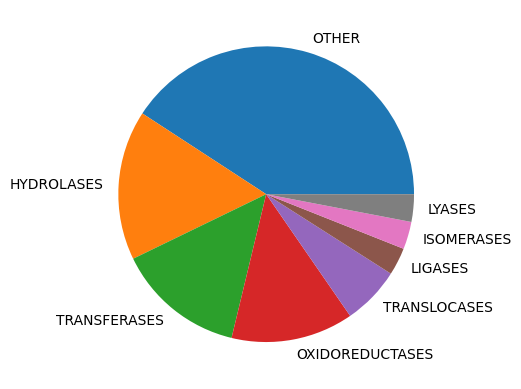

In [3]:
class_data = f9_300_no['Class'].value_counts()
plt.pie(class_data,labels=class_data.keys())
plt.savefig("./Processed Data/f9-pieplot.png")

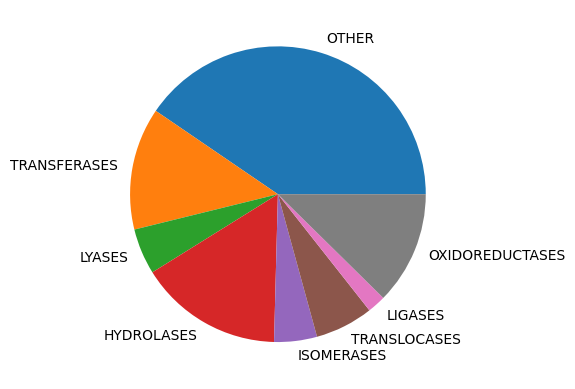

In [5]:
f9_300_no = pd.read_csv('./Processed Data/nqh-PHMPR-300-NO.csv', index_col=0)
class_data = f9_300_no['Class'].value_counts(sort=False)
plt.pie(class_data,labels=class_data.keys())
plt.savefig("./Processed Data/f9-pieplot.png")